In [1]:
import os
import pandas as pd
import numpy as np
from siuba import *
from siuba.dply.vector import * 
from plotnine import *

import plotly.express as px

In [16]:
os.chdir("C:\\Users\\hp master\\Documents\\SciData\\23_ML_Py\\data\\")
simulacion = pd.read_csv("simulacion1.csv")
simulacion = simulacion >> mutate(objetivo = _.objetivo.astype(str))

In [17]:
simulacion

,col1,col2,objetivo
0,-0.002525,0.030912,1
1,-0.008918,-0.105970,1
2,-0.031128,-0.791922,0
3,0.099966,0.145785,1
4,0.106643,-0.652662,0
5,-0.106901,0.050429,1
6,-0.107703,0.735127,0
7,0.133410,-0.896708,0
8,0.148506,-0.185297,1
9,-0.176215,-0.184876,1


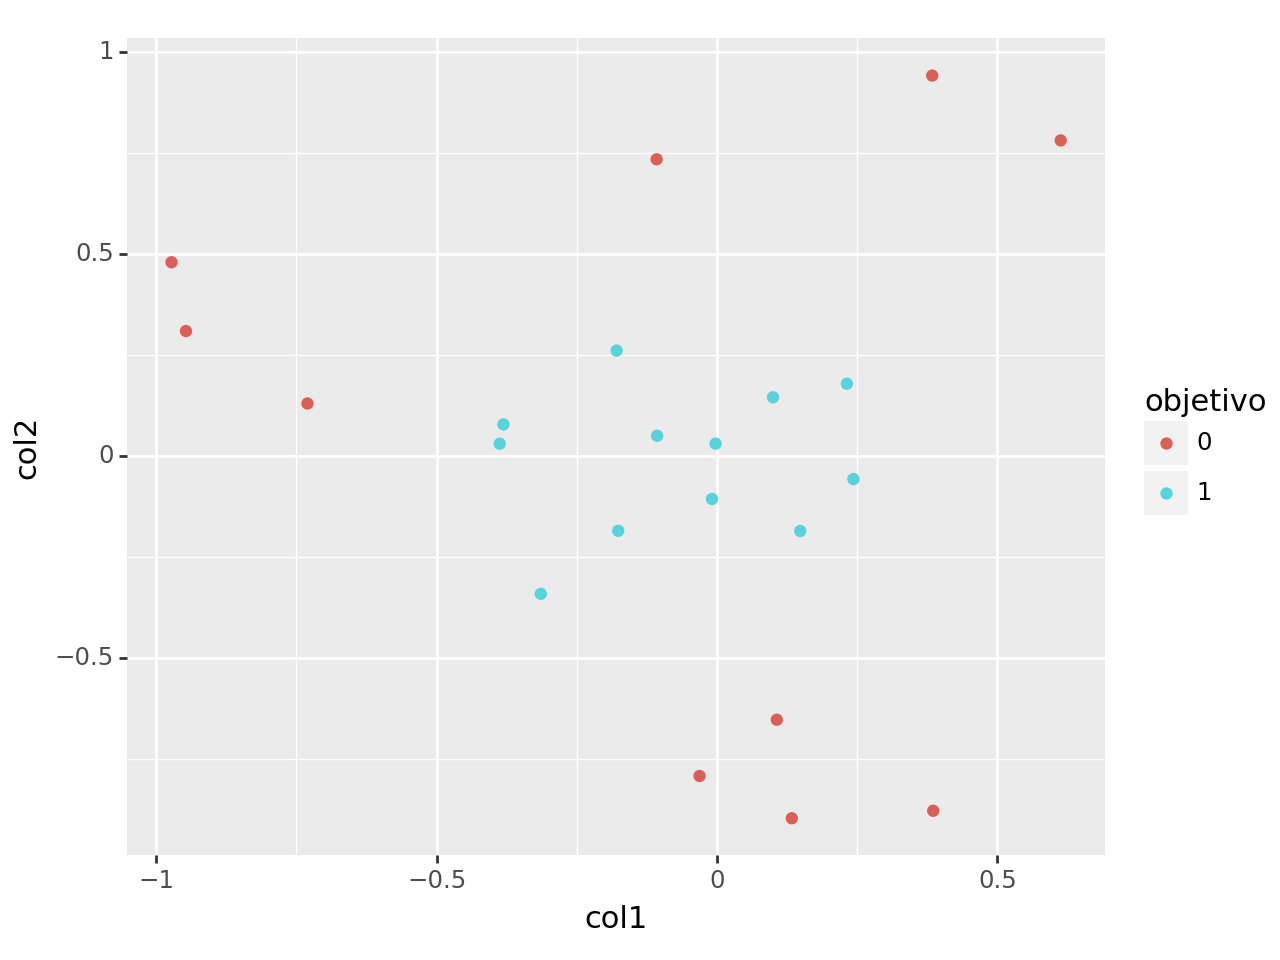

<Figure Size: (640 x 480)>

In [3]:
(ggplot(data = simulacion) +
    geom_point(mapping=aes(x="col1",y="col2",color="objetivo"))
)

In [18]:
# kernel: k(x,y)=x^2+y^2
simulacion = simulacion >> mutate(z = _.col1**2+_.col2**2)

In [19]:
simulacion

,col1,col2,objetivo,z
0,-0.002525,0.030912,1,0.000962
1,-0.008918,-0.105970,1,0.011309
2,-0.031128,-0.791922,0,0.628109
3,0.099966,0.145785,1,0.031246
4,0.106643,-0.652662,0,0.437341
5,-0.106901,0.050429,1,0.013971
6,-0.107703,0.735127,0,0.552012
7,0.133410,-0.896708,0,0.821884
8,0.148506,-0.185297,1,0.056389
9,-0.176215,-0.184876,1,0.065231


In [14]:
import plotly.graph_objects as go

fig2 = px.scatter_3d(simulacion, x='col1', y='col2', z='z',
              color='objetivo')

fig2.show()

In [15]:
x = np.outer(np.linspace(-1, 1, 30), np.ones(30))
y = x.copy().T
z = x ** 2 + y ** 2
  
fig1 = go.Figure(data=[go.Surface(x=x, y=y, z=z)])
fig2 = px.scatter_3d(simulacion, x='col1', y='col2', z='z',
              color='objetivo')

fig = go.Figure(data = fig1.data + fig2.data)
fig.show()